In [ ]:
import os
path=r"C:\Users\Saieesh\Downloads\Derivatives"
os.chdir(path)
os.getcwd

<function nt.getcwd()>

C:\Users\Saieesh\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Saieesh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Saieesh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Saieesh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\Saieesh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  lo

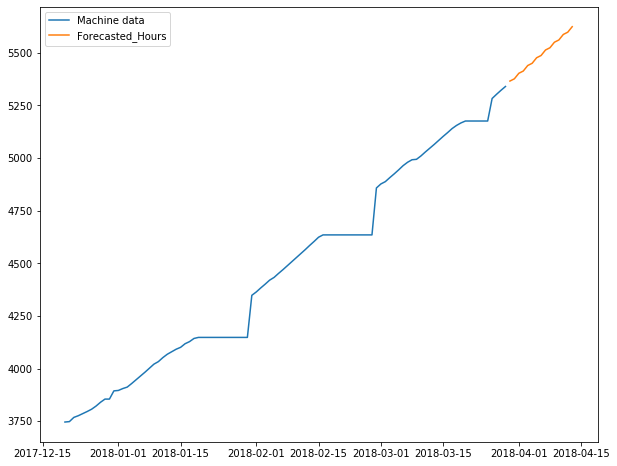

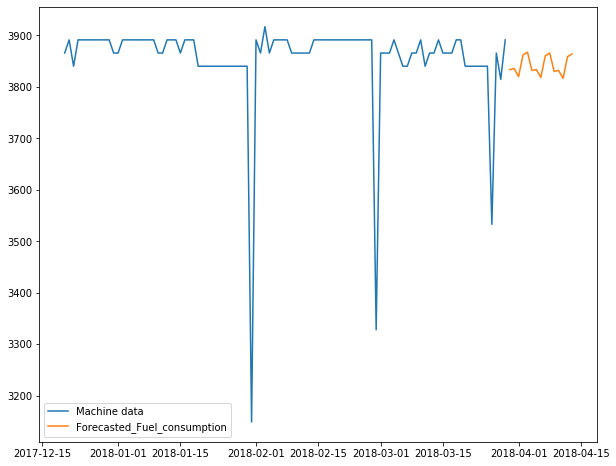

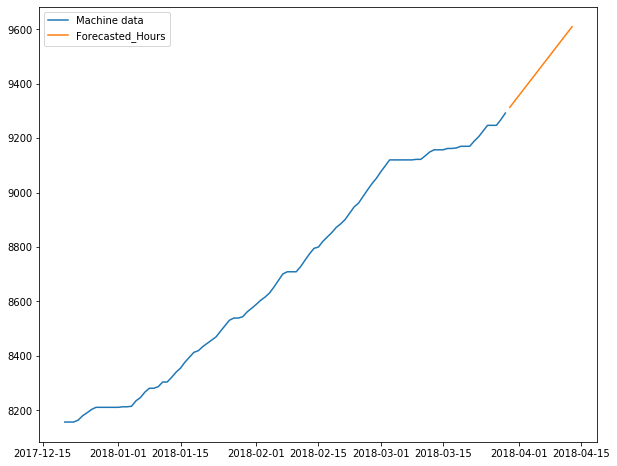

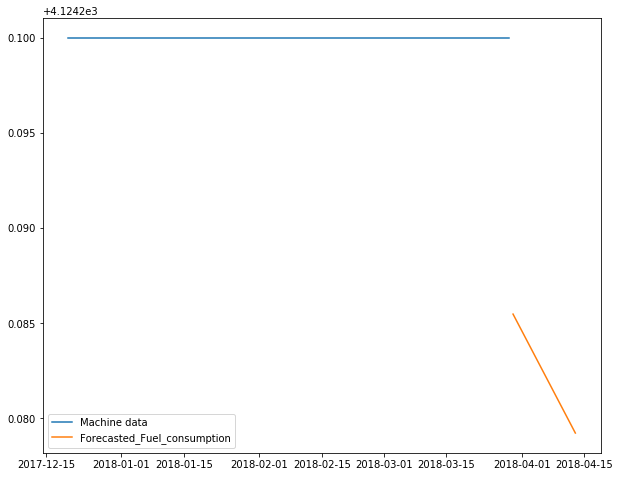

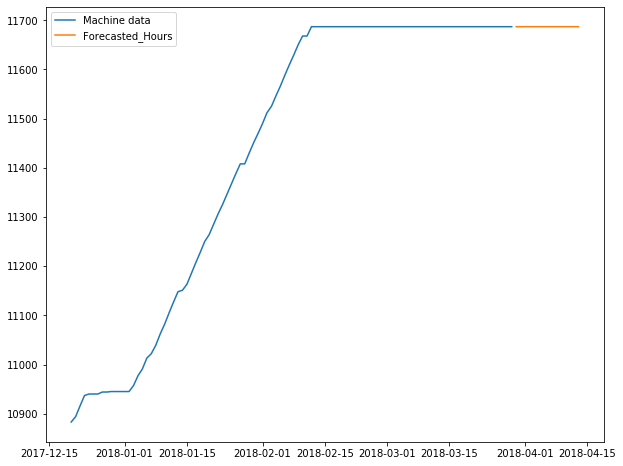

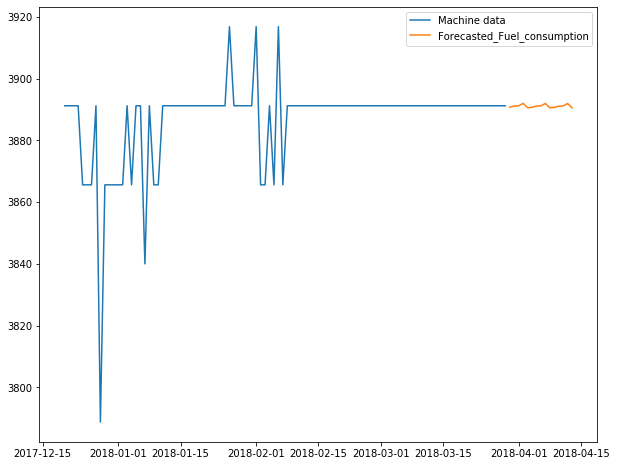

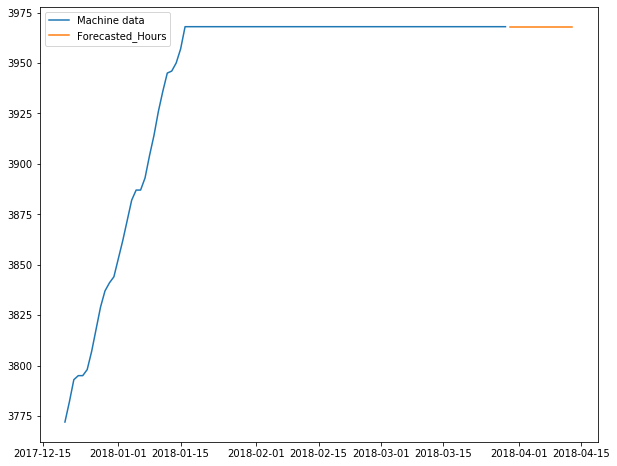

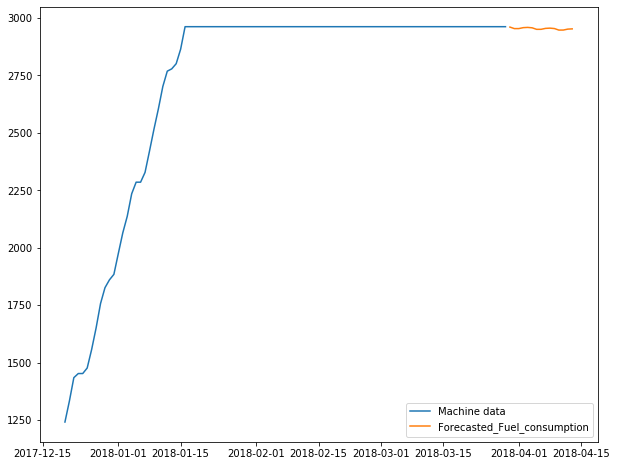

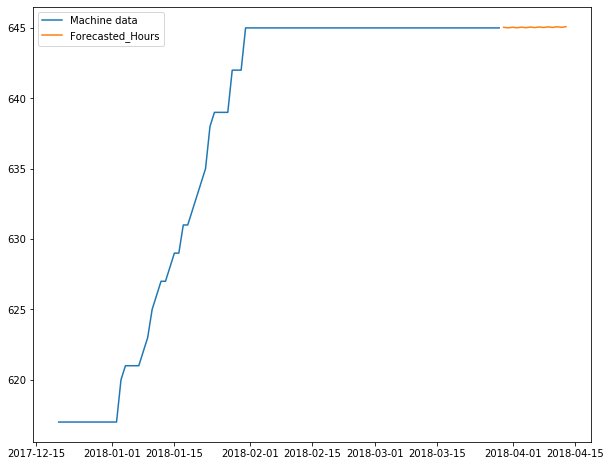

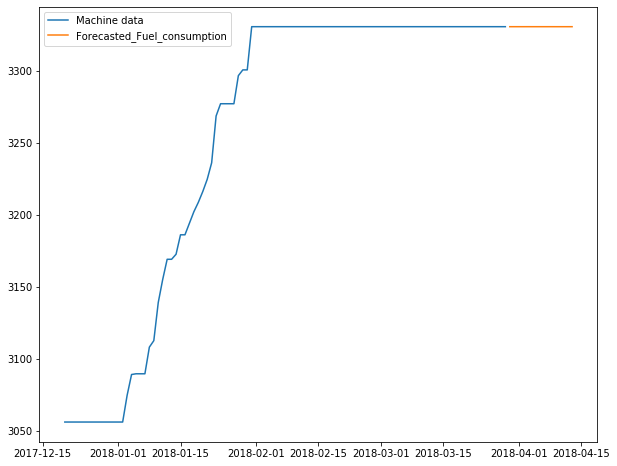

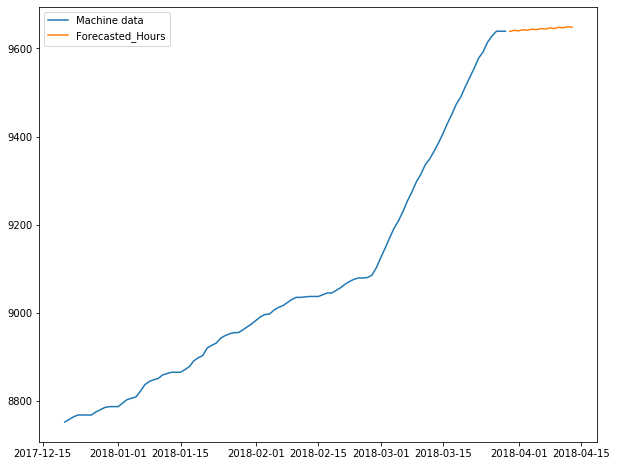

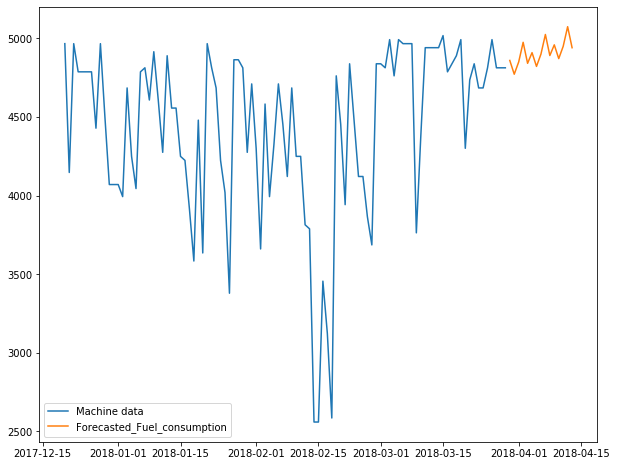

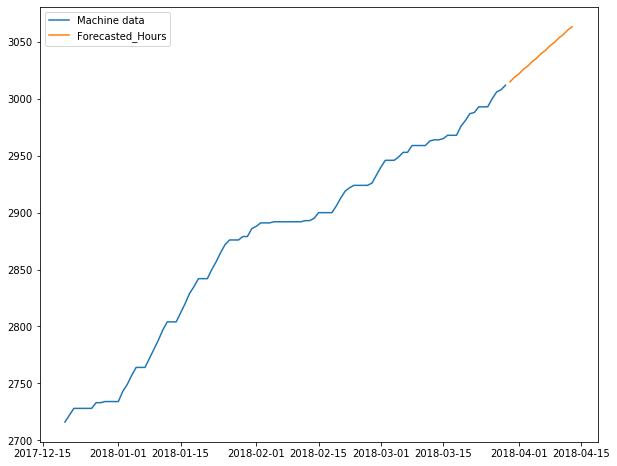

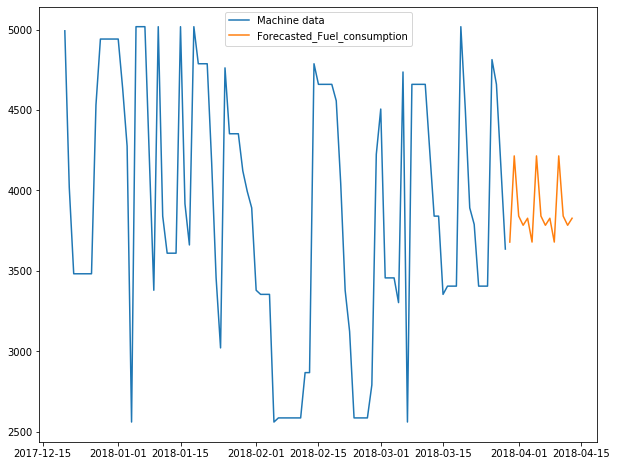

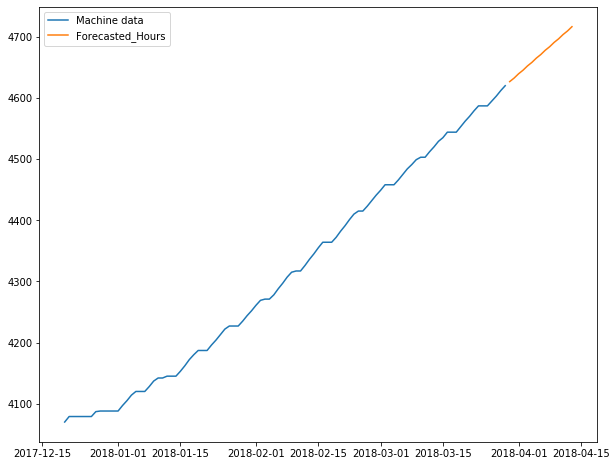

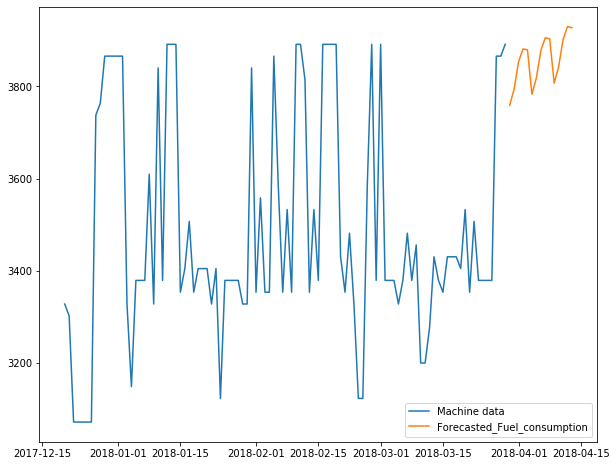

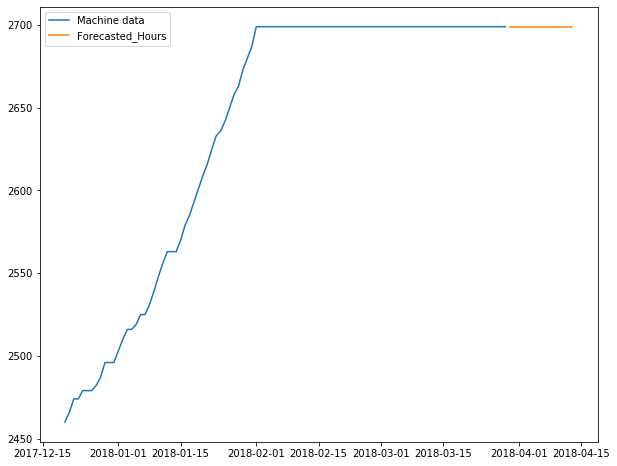

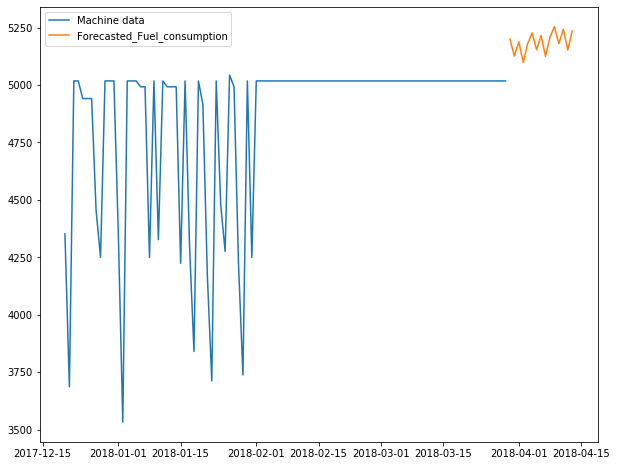

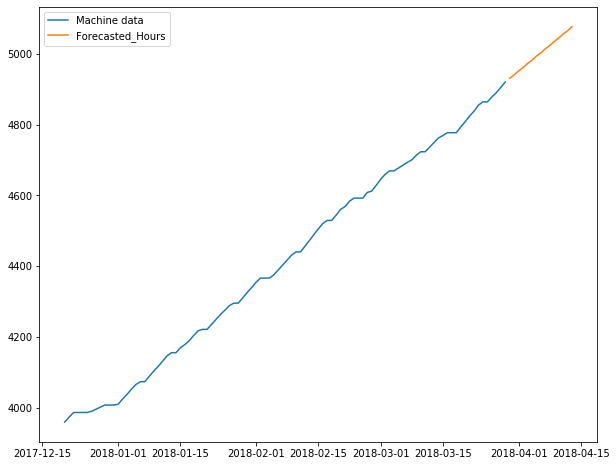

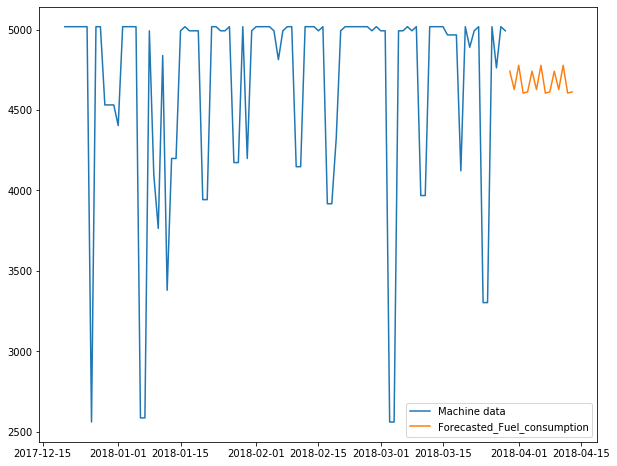

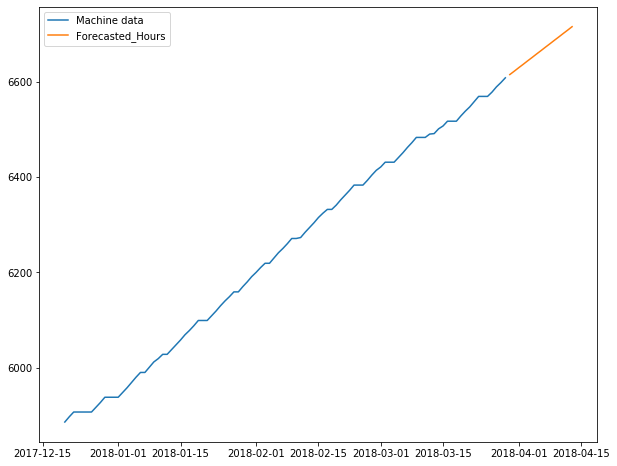

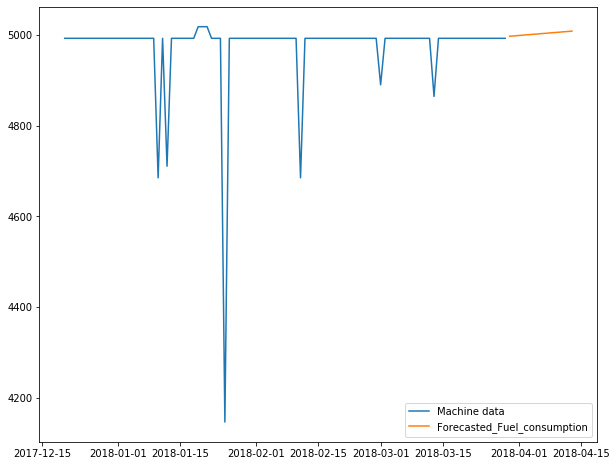

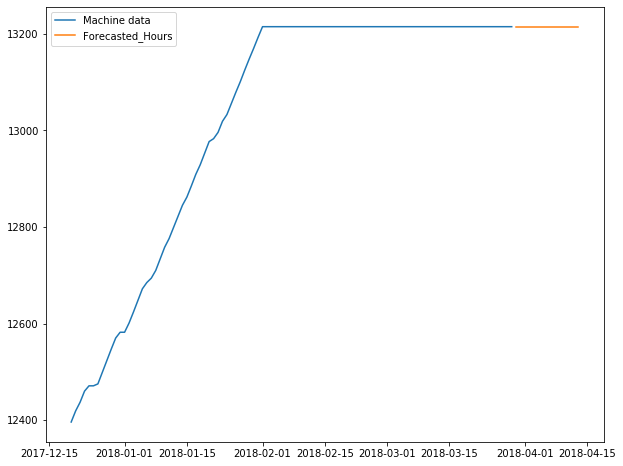

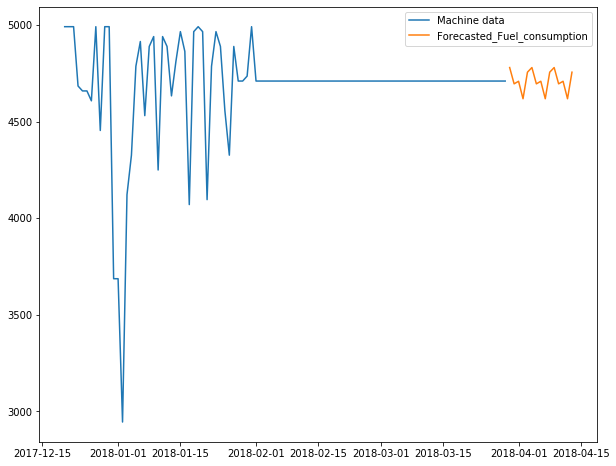

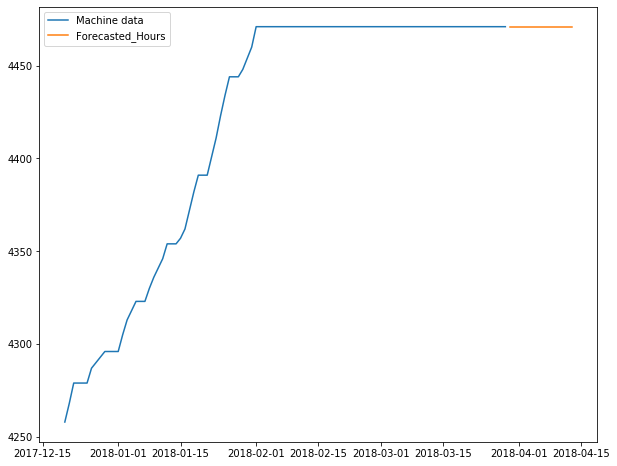

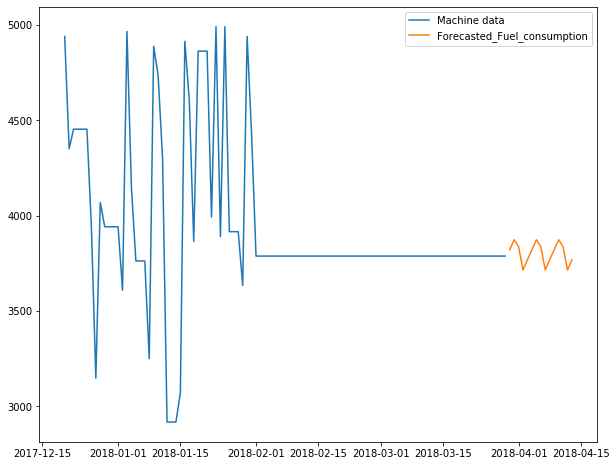

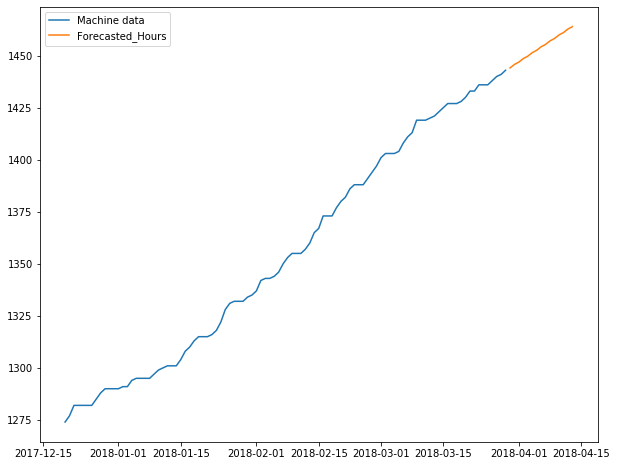

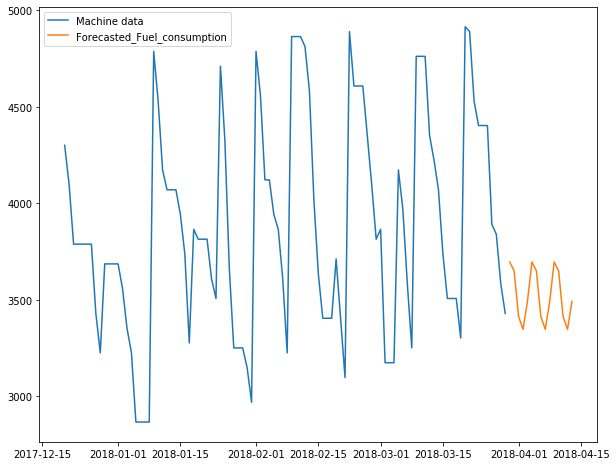

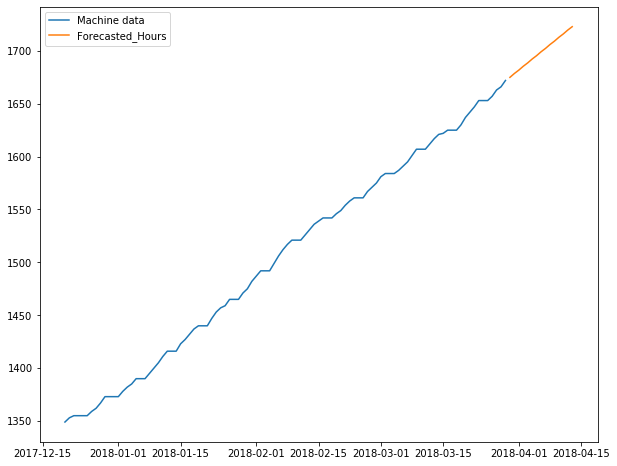

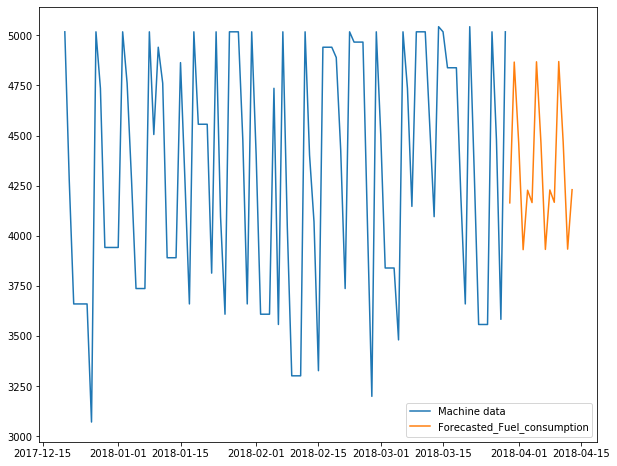

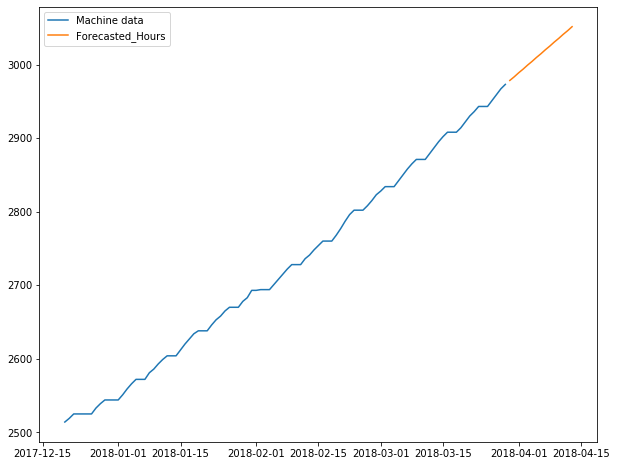

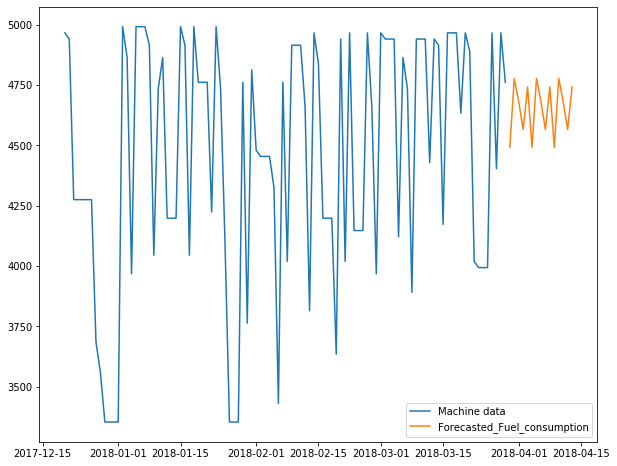

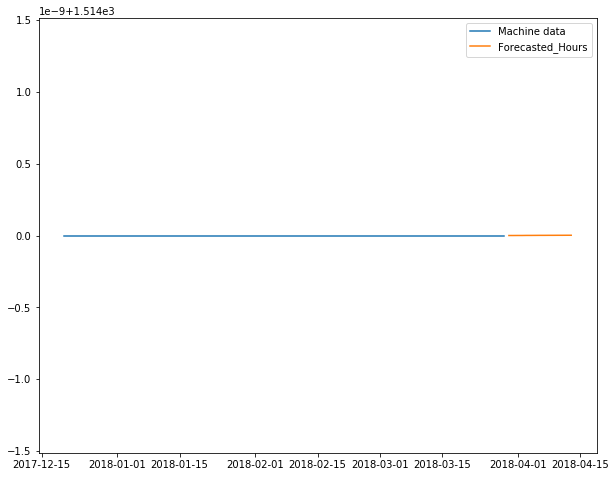

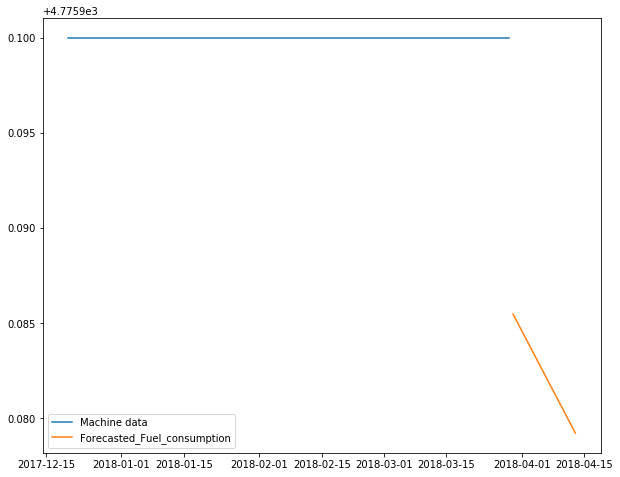

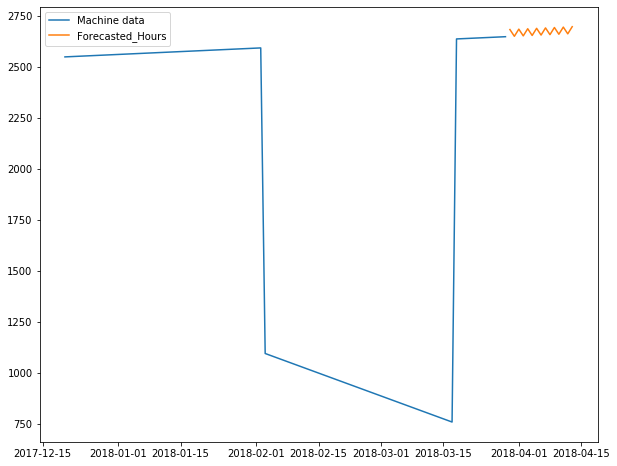

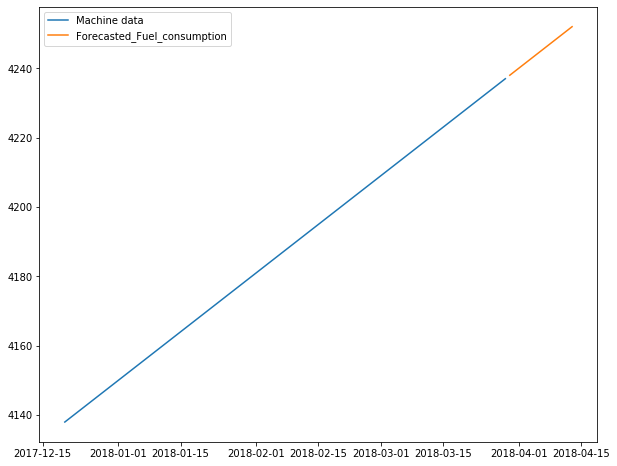

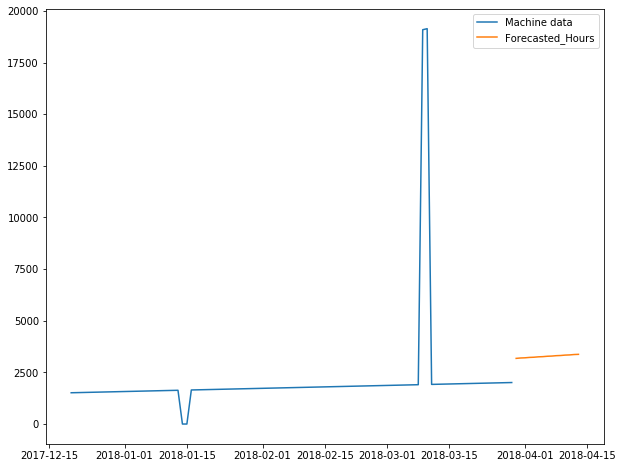

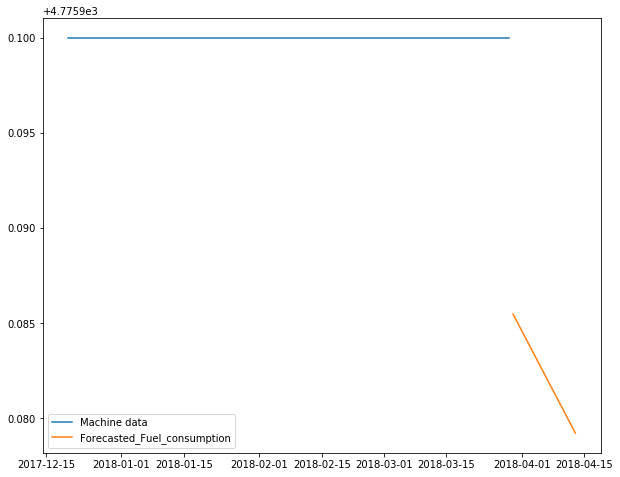

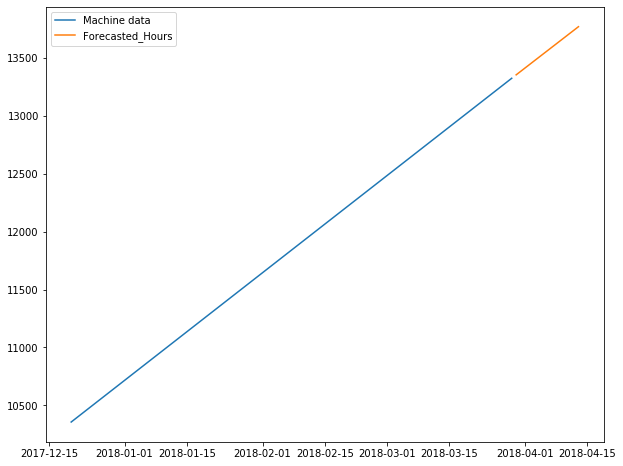

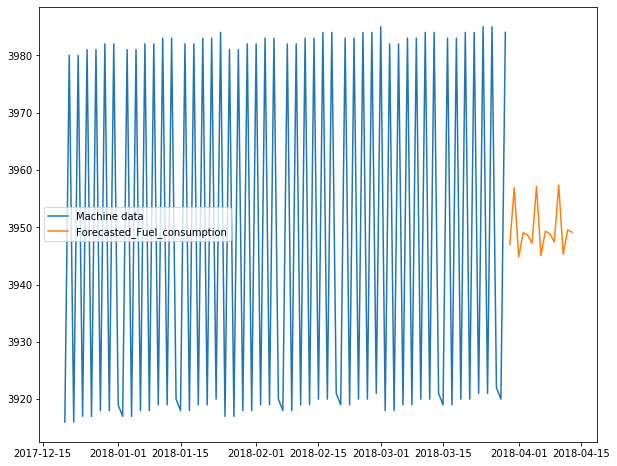

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt


df = pd.read_csv('WTI.csv') 
volume = df['volume'].unique().tolist()

outputcsv = []

for id in volume:
    df2 = df[(df['volume']==id) & (df['time']!='2017-12-19')] 
    df2['Date'] = pd.to_datetime(df2.time,format='%Y-%m-%d') 
    df2.index = df2['Date'] 
    train_set = df2[0:100] 
    test_set = df2[85:]  
    #train_set['volume'].plot(figsize=(10,8))
    #test_set['volume'].plot(figsize=(10,8))
    #plt.show()
    
    predict = test_set.copy()
    predict.index = predict.index + pd.to_timedelta(15,unit='d')
    predict['time'] = predict.index
    
    
    #Forecasting for volumes
    #Used trial and error for the seasonal_periods parameter
    #forecast_oh = sm.tsa.statespace.SARIMAX(np.asarray(train_set['volume']), order=(1, 1, 4),seasonal_order=(0,1,1,7)).fit()
    forecast_oh = ExponentialSmoothing(np.asarray(train_set['volume']) ,seasonal_periods=2 ,trend='add', seasonal='add').fit()
    predict['volume'] = forecast_oh.forecast(len(test_set))
    plt.figure(figsize=(10,8))
    plt.plot( train_set['volume'], label='Machine data')
    #plt.plot( test_set['operating_hours'], label='Test')
    plt.plot(predict['volume'], label='Forecasted_volume')
    plt.legend(loc='best')
    plt.savefig('./volume plots/'+str(id)+'.jpg')
    #plt.show()
    
    #In the above snippet, I had first performed ARIMA algo but Holt-Winter's exponential ---
    #--- smoothening was giving better and comfortable results(Explained in report)
    
    
    #Forecasting for oil consumption, same as the operating_hours snippet
    forecast_fc = ExponentialSmoothing(np.asarray(train_set['fuel_consumption(liter)']),seasonal_periods=5, trend='add', seasonal='add').fit()
    #forecast_fc = sm.tsa.statespace.SARIMAX(np.asarray(train_set['oil_consumption(liter)']), order=(1, 1, 4),seasonal_order=(0,1,1,7)).fit()
    predict['oil_consumption(liter)'] = forecast_fc.forecast(len(test_set))
    plt.figure(figsize=(10,8))
    plt.plot( train_set['oil_consumption(liter)'], label='Machine data')
    #plt.plot( test_set['fuel_consumption(liter)'], label='Test')
    plt.plot(predict['oil_consumption(liter)'], label='Forecasted_Fuel_consumption')
    plt.legend(loc='best')
    plt.savefig('./oil-comsumption_forecast plots/'+str(id)+'.jpg')
    #plt.show()
    
    del predict['Date']
    #Used to check accuracy
    #rms = sqrt(mean_squared_error(test_set['operating_hours'], predict['operating_hours']))
    #print(rms)
    
    outputcsv.append(predict)

df3 = pd.concat(outputcsv, ignore_index=True)
df3.to_csv('output.csv', index=False)

